In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('shampoo_with_exog.csv')
data.head()

,Month,Sales,Inflation
0,1-Jan,266.0,1
1,2-Jan,145.9,3
2,3-Jan,183.1,5
3,4-Jan,119.3,5
4,5-Jan,180.3,4


In [4]:
data122 = pd.read_csv('shampoo_with_exog.csv')
data122.head()

,Month,Sales,Inflation
0,1-Jan,266.0,1
1,2-Jan,145.9,3
2,3-Jan,183.1,5
3,4-Jan,119.3,5
4,5-Jan,180.3,4


In [5]:
data122.Month = pd.to_datetime(data122.Month, format='%d-%b')

In [6]:
data122.head()

,Month,Sales,Inflation
0,1900-01-01,266.0,1
1,1900-01-02,145.9,3
2,1900-01-03,183.1,5
3,1900-01-04,119.3,5
4,1900-01-05,180.3,4


In [8]:
data1 = data.copy()

In [9]:
data1['Month'] = "2018-" + data1['Month']

In [11]:
data1['Month']

0      2018-1-Jan
1      2018-2-Jan
2      2018-3-Jan
3      2018-4-Jan
4      2018-5-Jan
5      2018-6-Jan
6      2018-7-Jan
7      2018-8-Jan
8      2018-9-Jan
9     2018-10-Jan
10    2018-11-Jan
11    2018-12-Jan
12     2018-1-Feb
13     2018-2-Feb
14     2018-3-Feb
15     2018-4-Feb
16     2018-5-Feb
17     2018-6-Feb
18     2018-7-Feb
19     2018-8-Feb
20     2018-9-Feb
21    2018-10-Feb
22    2018-11-Feb
23    2018-12-Feb
24     2018-1-Mar
25     2018-2-Mar
26     2018-3-Mar
27     2018-4-Mar
28     2018-5-Mar
29     2018-6-Mar
30     2018-7-Mar
31     2018-8-Mar
32     2018-9-Mar
33    2018-10-Mar
34    2018-11-Mar
35    2018-12-Mar
Name: Month, dtype: object

In [12]:
data1.Month = pd.to_datetime(data1.Month, format='%Y-%d-%b')

In [13]:
data1.head()

,Month,Sales,Inflation
0,2018-01-01,266.0,1
1,2018-01-02,145.9,3
2,2018-01-03,183.1,5
3,2018-01-04,119.3,5
4,2018-01-05,180.3,4


https://www.journaldev.com/23365/python-string-to-datetime-strptime

In [14]:
data_2 = pd.read_csv('shampoo_sales.csv')
data_2.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [15]:
data_2.shape

(36, 2)

In [16]:
data_2['Month'] = '2018-' + data_2['Month'] 
data_2.head()

,Month,Sales
0,2018-1-01,266.0
1,2018-1-02,145.9
2,2018-1-03,183.1
3,2018-1-04,119.3
4,2018-1-05,180.3


In [17]:
data101 = data_2.copy()

In [18]:
data101.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   36 non-null     object 
 1   Sales   36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 704.0+ bytes


In [19]:
data101.describe()

,Sales
count,36.000000
mean,312.600000
std,148.937164
min,119.300000
25%,192.450000
50%,280.150000
75%,411.100000
max,682.000000


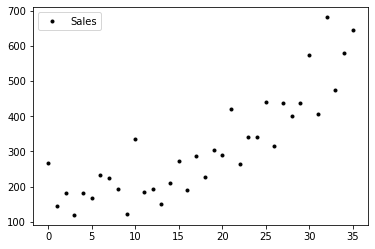

In [20]:
data101.plot(style=('k.'))

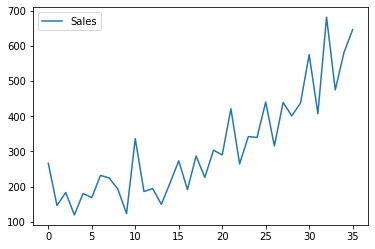

In [21]:
data101.plot()

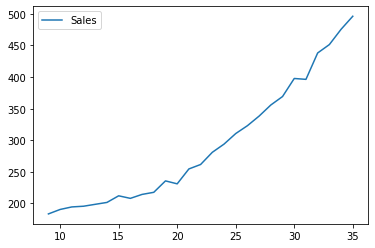

In [22]:
# Smoothing (It is done by calculating the moving average)

data101_ma = data101.rolling(window = 10).mean()
data101_ma.plot()

In [23]:
# Moving Average is used in stock market analysis
# Creation of a base line model

In [24]:
data101.dtypes

Month     object
Sales    float64
dtype: object

In [25]:
data101['Month'] = pd.to_datetime(data101['Month'])

In [26]:
data101['Months'] = data101['Month'].dt.month
data101['Days'] = data101['Month'].dt.date

In [28]:
data101.drop(['Days'], axis =1, inplace = True)

In [29]:
data101.head(3)

,Month,Sales,Months
0,2018-01-01,266.0,1
1,2018-01-02,145.9,1
2,2018-01-03,183.1,1


In [30]:
#print(data_2.dtypes)
data_2['Month'] = pd.to_datetime(data_2['Month'])

In [31]:
data_2.set_index('Month', inplace = True)

In [32]:
data_2.head()

,Sales
Month,
2018-01-01,266.0
2018-01-02,145.9
2018-01-03,183.1
2018-01-04,119.3
2018-01-05,180.3


In [33]:
# Shift methods is used to shift datapoints down
data_2_base = pd.concat([data_2, data_2.shift(1)], axis =1)

In [34]:
data_2_base.head()

,Sales,Sales
Month,,
2018-01-01,266.0,NaN
2018-01-02,145.9,266.0
2018-01-03,183.1,145.9
2018-01-04,119.3,183.1
2018-01-05,180.3,119.3


In [35]:
data_2_base.columns =['Actual Sales', 'Forecast_sales']

In [36]:
data_2_base.head()

,Actual Sales,Forecast_sales
Month,,
2018-01-01,266.0,NaN
2018-01-02,145.9,266.0
2018-01-03,183.1,145.9
2018-01-04,119.3,183.1
2018-01-05,180.3,119.3


In [37]:
data_2_base.dropna(inplace = True)

In [38]:
from sklearn.metrics import mean_squared_error as mae

In [39]:
square_error = np.sqrt(mae(data_2_base['Actual Sales'], data_2_base['Forecast_sales']))
square_error

108.23764726616282

In [40]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

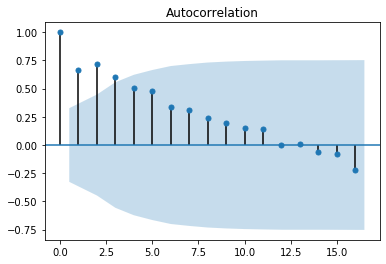

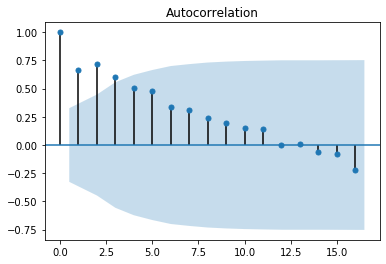

In [41]:
plot_acf(data_2)  #-> it is used to fix the value of moving avergae (MA) Q is 3

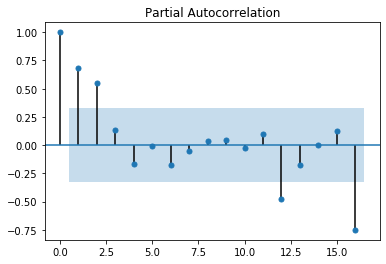

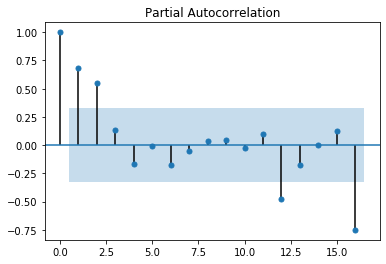

In [42]:
plot_pacf(data_2) #pacf is used to fix the value of AR (P) # P is 2

In [43]:
from statsmodels.tsa.arima_model import ARIMA

In [44]:
traindata = data_2[:25]
testdata = data_2[25:36]

In [45]:
model = ARIMA(traindata, order =(3,1,2))
model_fit = model.fit()
model_forecast = model_fit.forecast(steps =11)[0]

In [46]:
model_fit.aic  #lesser the value better the model

272.38919480721506

In [47]:
np.sqrt(mae(testdata, model_forecast))  #Baseine model is better then ARIMA model

130.9272480085368

In [48]:
p_values = range(0,5)
d_values = range(0,3)
q_values = range(0,5)

In [49]:
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p,d,q)
            train,test =data_2[:25],data_2[25:36]
            predictions = list()
            for i in range(len(test)):
                try:
                    model =ARIMA(train, order)
                    model_fit = model.fit(disp=0)
                    pred_y = model_fit.forecast()[0]
                    predictions.append(pred_y)
                    error = mae(test, predictions)
                    print('ARIMA%s MSE = %.2f'%(order,error))
                except:
                    continue

ARIMA(0, 0, 0) MSE = 77950.15
ARIMA(0, 0, 1) MSE = 70119.33
ARIMA(0, 0, 2) MSE = 58566.78
ARIMA(0, 0, 3) MSE = 62031.30
ARIMA(0, 1, 0) MSE = 33849.87
ARIMA(0, 1, 1) MSE = 40654.43
ARIMA(0, 1, 2) MSE = 34511.78
ARIMA(0, 1, 3) MSE = 41467.21
ARIMA(0, 1, 4) MSE = 14452.73
ARIMA(0, 2, 0) MSE = 34017.03
ARIMA(0, 2, 1) MSE = 28393.15
ARIMA(0, 2, 2) MSE = 24229.72
ARIMA(0, 2, 3) MSE = 23001.11
ARIMA(1, 0, 0) MSE = 61159.04
ARIMA(1, 0, 1) MSE = 46528.99
ARIMA(1, 0, 2) MSE = 43922.45
ARIMA(1, 0, 3) MSE = 34856.80
ARIMA(1, 0, 4) MSE = 25186.20
ARIMA(1, 1, 0) MSE = 31687.07
ARIMA(1, 1, 1) MSE = 42176.68
ARIMA(1, 2, 0) MSE = 18845.80
ARIMA(1, 2, 1) MSE = 26129.54
ARIMA(2, 0, 0) MSE = 45248.18
ARIMA(2, 0, 1) MSE = 34051.81
ARIMA(2, 0, 3) MSE = 36395.31
ARIMA(2, 1, 0) MSE = 35488.37
ARIMA(2, 1, 1) MSE = 39633.97
ARIMA(2, 1, 2) MSE = 35884.79
ARIMA(2, 2, 0) MSE = 34024.29
ARIMA(3, 0, 0) MSE = 46326.49
ARIMA(3, 1, 0) MSE = 22024.83
ARIMA(3, 1, 1) MSE = 22841.66
ARIMA(3, 1, 2) MSE = 18095.38
ARIMA(3, 1

In [50]:
np.sqrt(14492.10)  # ARIMA( P= 3, d = 2, Q = 3) RMSE = 14492.10

120.38313835417317

In [55]:
model_forecast

array([439.5456244 , 388.50744599, 401.24285657, 402.35251588,
       483.94510573, 507.79642228, 516.44748715, 502.58026091,
       545.08941747, 597.49532926, 637.40431404])

In [79]:
model=ARIMA(data_2['Sales'],order=(3,2,3))
model_fit=model.fit()

In [80]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D2.Sales   No. Observations:                   34
Model:                 ARIMA(3, 2, 3)   Log Likelihood                -195.052
Method:                       css-mle   S.D. of innovations             65.389
Date:                Sun, 18 Oct 2020   AIC                            406.105
Time:                        00:26:38   BIC                            418.316
Sample:                             2   HQIC                           410.269
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.5080      3.833      0.393      0.694      -6.005       9.021
ar.L1.D2.Sales    -1.3846      0.199     -6.970      0.000      -1.774      -0.995
ar.L2.D2.Sales    -0.4562      0.334     -1.365      0.172      -1.111       0.199
ar.L3.D2.Sales     0.0103      0.198      0.052      0.959      -0.378       0.399
ma.L1.D2.Sales    -0.5086      0.154     -3.307      0.001      -0.810      -0.207
ma.L2.D2.Sales    -0.5086      0.138     -3.697      0.000      -0.778      -0.239
ma.L3.D2.Sales     1.0000      0.177      5.659      0.000       0.654       1.346
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.2615           +0.0000j            1.2615            0.5000
AR.2           -1.6313           +0.0000j            1.6313            0.5000
AR.3           47.3025           +0.0000j           47.3025            0.0000
MA.1           -1.0000           -0.0000j            1.0000           -0.5000
MA.2            0.7543           -0.6565j            1.0000           -0.1140
MA.3            0.7543           +0.6565j            1.0000            0.1140
-----------------------------------------------------------------------------
"""

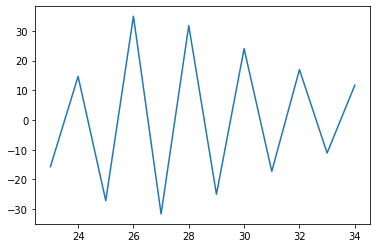

In [89]:
 model_fit.predict(start=25,end=36,dynamic=True).plot()

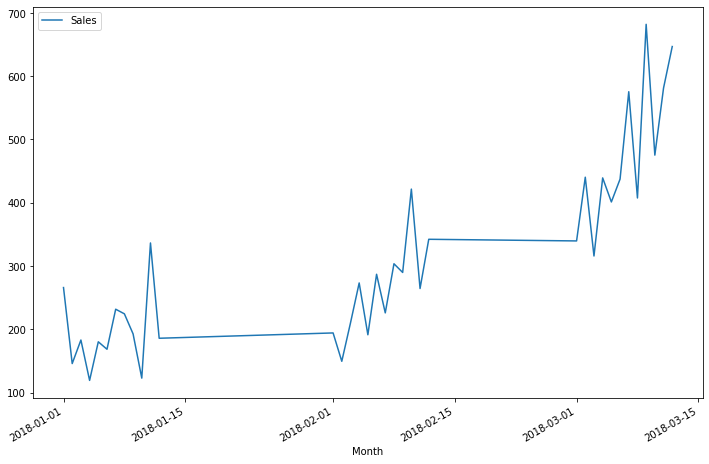

In [90]:
#data_2['forecasts']=model_fit.predict(start=25,end=36,dynamic=True)
data_2[['Sales']].plot(figsize=(12,8))